In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets

import random

In [2]:
def pi(yy):
    pi_k = []
    for i in np.unique(yy):
        pi_k.append(np.sum(yy == i)/len(y))
    pi_k = np.array(pi_k)
    return pi_k

In [3]:
def miu(XX, yy):
    miu_k = []
    for i in np.unique(yy):
        miu_k.append(np.mean(XX[yy == i], axis = 0))
    
    miu_k = np.array(miu_k)
    return miu_k

In [4]:
def delta(XX, yy, pi_ks, miu_ks, sigma):
    deltas = np.zeros((XX.shape[0], np.unique(yy).shape[0]))

    for i, x in enumerate(XX):
        for j in np.unique(yy):
            deltas[i,j] = x.T.dot(np.linalg.inv(sigma)).dot(miu_ks[j].T)
            deltas[i,j] = deltas[i,j] - 0.5*miu_ks[j].dot(np.linalg.inv(sigma)).dot(miu_ks[j].T)
            deltas[i,j] = deltas[i,j] + np.log(pi_ks[j])
    predictions = np.argmax(deltas, axis = 1) 
    accuracy = ((predictions == yy).sum())/len(predictions)
    return deltas, predictions, accuracy

In [5]:
iris = datasets.load_iris()

In [6]:
y = iris.target

In [7]:
X = iris.data

In [8]:
data =np.hstack((X, y.reshape(y.shape[0], 1)))

In [9]:
np.random.shuffle(data)

In [10]:
y = data[:,-1].astype(np.int)

In [11]:
X = data[:, :-1]

In [12]:
X_train = X[ :130,:]

In [13]:
X_test = X[130:, :]

In [14]:
y_train = y[:130]

In [15]:
y_test = y[130:]

In [16]:
sig = np.cov(X_train.T)

In [17]:
mius = miu(X_train, y_train)

In [18]:
pis = pi(y_train)

In [19]:
train_deltas, train_preds, train_accuracy = delta(X_train, y_train, pis, mius, sig)

In [20]:
test_deltas, test_preds, test_accuracy = delta(X_test, y_test, pis, mius, sig)

In [21]:
test_accuracy

0.85

In [22]:
train_accuracy

0.8692307692307693

### As we see the accuracy of the LDA on the training set is 0.88, while the accuracy on the test set is 0.8. 

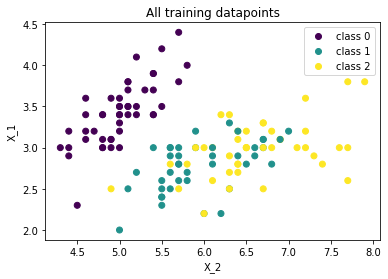

In [23]:
scatter = plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.xlabel('X_2')
plt.ylabel('X_1')
plt.title('All training datapoints')
plt.legend(handles=scatter.legend_elements()[0], labels=['class 0', 'class 1', 'class 2'])

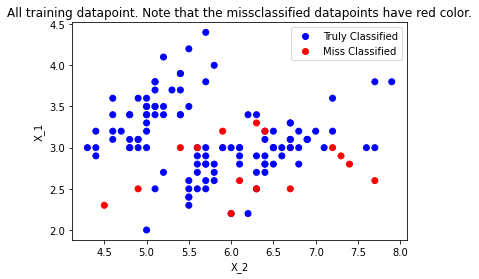

In [24]:
scatter = plt.scatter(X_train[:,0], X_train[:,1], c=y_train!= train_preds, cmap = 'bwr')
plt.xlabel('X_2')
plt.ylabel('X_1')
plt.title('All training datapoint. Note that the missclassified datapoints have red color.')
plt.legend(handles=scatter.legend_elements()[0], labels=['Truly Classified', 'Miss Classified'])

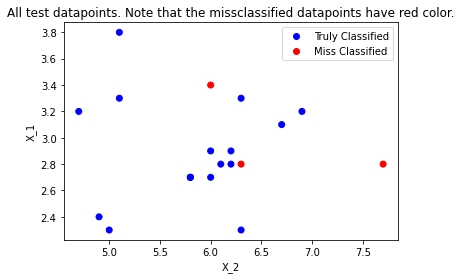

In [25]:
scatter = plt.scatter(X_test[:,0], X_test[:,1], c=y_test!= test_preds, cmap = 'bwr')
plt.xlabel('X_2')
plt.ylabel('X_1')
plt.title('All test datapoints. Note that the missclassified datapoints have red color.')
plt.legend(handles=scatter.legend_elements()[0], labels=['Truly Classified', 'Miss Classified'])